<a href="https://colab.research.google.com/github/Akash-mahandargi/PCA/blob/main/SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


In [3]:
df = pd.read_csv('mushroom.csv')


<Axes: xlabel='class', ylabel='count'>

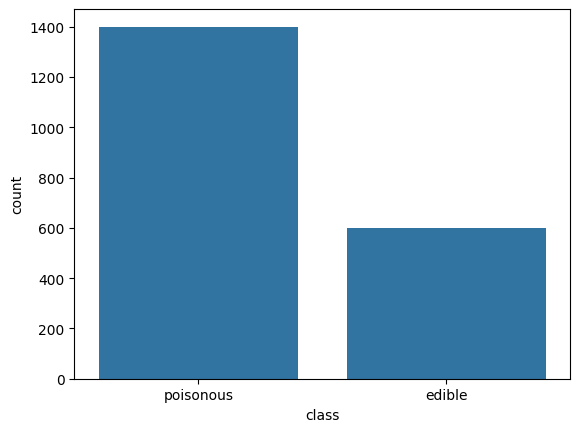

In [4]:
df.head()
df.isnull().sum()
df['class'].value_counts()
sns.countplot(x='class', data=df)


In [5]:
le = LabelEncoder()
for col in df.columns:
    df[col] = le.fit_transform(df[col])


<Axes: >

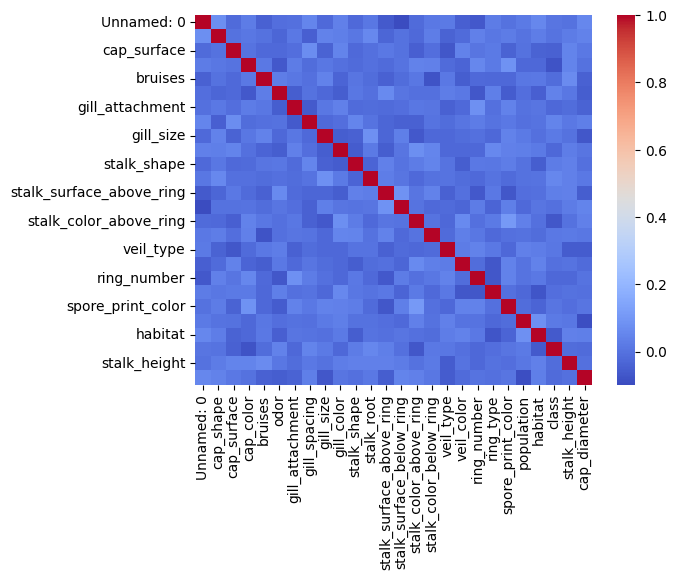

In [6]:
sns.heatmap(df.corr(), cmap='coolwarm')


In [7]:
X = df.drop('class', axis=1)  # Features (all columns except target)
y = df['class']               # Target variable (edible or poisonous)

In [8]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

In [11]:
svm = SVC(kernel='rbf', C=1.0)
svm.fit(X_train, y_train)


SVC()

In [12]:
y_pred = svm.predict(X_test)

In [13]:
accuracy_score(y_test, y_pred)
confusion_matrix(y_test, y_pred)
classification_report(y_test, y_pred)

'              precision    recall  f1-score   support\n\n           0       0.90      0.35      0.50       185\n           1       0.77      0.98      0.86       415\n\n    accuracy                           0.79       600\n   macro avg       0.84      0.66      0.68       600\nweighted avg       0.81      0.79      0.75       600\n'

In [16]:
for kernel in ['linear', 'poly', 'rbf', 'sigmoid']:
    model = SVC(kernel=kernel)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"Kernel: {kernel}")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred))
    print("-" * 30)

Kernel: linear
Accuracy: 0.6916666666666667
Confusion Matrix:
 [[  0 185]
 [  0 415]]
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       185
           1       0.69      1.00      0.82       415

    accuracy                           0.69       600
   macro avg       0.35      0.50      0.41       600
weighted avg       0.48      0.69      0.57       600

------------------------------
Kernel: poly
Accuracy: 0.8116666666666666
Confusion Matrix:
 [[ 92  93]
 [ 20 395]]
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.50      0.62       185
           1       0.81      0.95      0.87       415

    accuracy                           0.81       600
   macro avg       0.82      0.72      0.75       600
weighted avg       0.81      0.81      0.80       600

------------------------------


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Kernel: rbf
Accuracy: 0.7866666666666666
Confusion Matrix:
 [[ 64 121]
 [  7 408]]
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.35      0.50       185
           1       0.77      0.98      0.86       415

    accuracy                           0.79       600
   macro avg       0.84      0.66      0.68       600
weighted avg       0.81      0.79      0.75       600

------------------------------
Kernel: sigmoid
Accuracy: 0.6683333333333333
Confusion Matrix:
 [[  0 185]
 [ 14 401]]
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       185
           1       0.68      0.97      0.80       415

    accuracy                           0.67       600
   macro avg       0.34      0.48      0.40       600
weighted avg       0.47      0.67      0.55       600

------------------------------


In [17]:
from sklearn.decomposition import PCA
X_pca = PCA(n_components=2).fit_transform(X_scaled)


In [18]:
svm_vis = SVC(kernel='rbf').fit(X_pca, y)


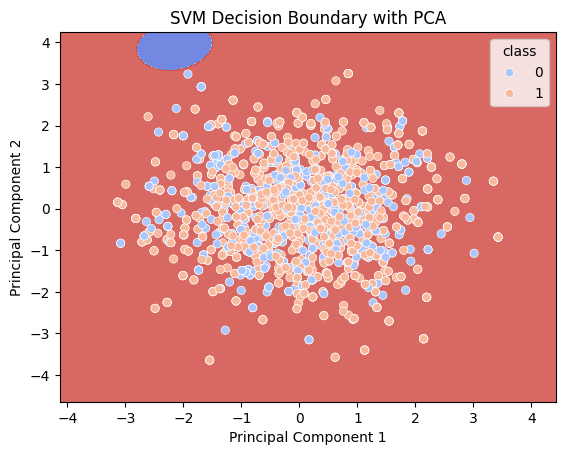

In [20]:
# Create a meshgrid to plot the decision boundary
x_min, x_max = X_pca[:, 0].min() - 1, X_pca[:, 0].max() + 1
y_min, y_max = X_pca[:, 1].min() - 1, X_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))

# Predict the class for each point in the meshgrid
Z = svm_vis.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the contour and the data points
plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.coolwarm)
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=y, palette='coolwarm', legend='full')

plt.title('SVM Decision Boundary with PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()